# AI-Powered Energy Consumption Forecasting for Smart Buildings

This notebook illustrates the use of supervised machine learning (Linear Regression) to predict energy consumption in a smart building based on environmental characteristics including temperature, humidity, and time of day.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Simulate hourly data for 1 year
np.random.seed(42)
n_samples = 365 * 24

hours = np.tile(np.arange(24), 365)
days = np.repeat(np.arange(365), 24)
temperature = 10 + 10 * np.sin(2 * np.pi * hours / 24) + np.random.normal(0, 2, n_samples)
humidity = 50 + 20 * np.cos(2 * np.pi * hours / 24) + np.random.normal(0, 5, n_samples)
energy_usage = 100 + 5 * temperature - 0.5 * humidity + 10 * np.sin(2 * np.pi * hours / 24) + np.random.normal(0, 5, n_samples)

data = pd.DataFrame({
    'hour': hours,
    'day': days,
    'temperature': temperature,
    'humidity': humidity,
    'energy_usage': energy_usage
})

data.head()

,hour,day,temperature,humidity,energy_usage
0,0,0,10.993428,74.857062,118.140360
1,1,0,12.311662,62.842223,136.327672
2,2,0,16.295377,61.382742,151.492583
3,3,0,20.117128,67.036685,182.615942
4,4,0,18.191947,59.678312,159.545000


In [3]:
X = data[['hour', 'temperature', 'humidity']]
y = data['energy_usage']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred = model.predict(X_test)

In [7]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.987
Mean Squared Error: 26.82


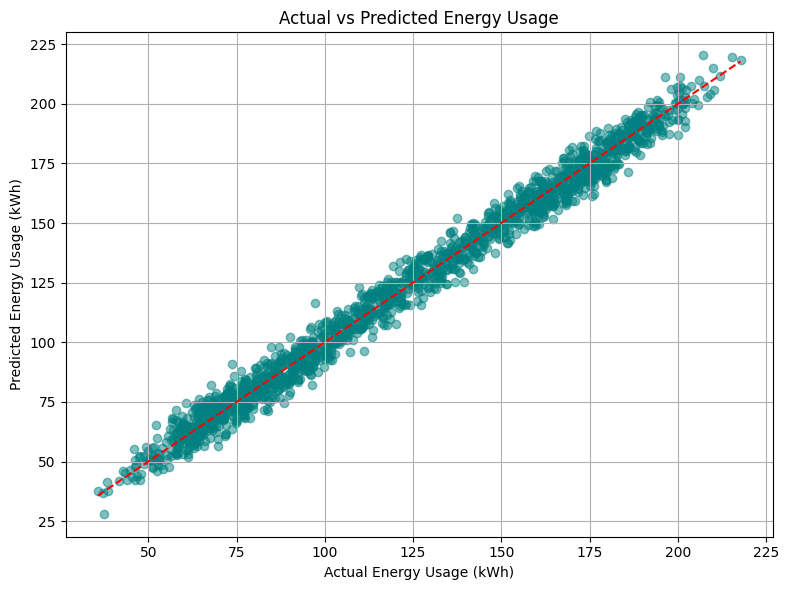

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Energy Usage (kWh)')
plt.ylabel('Predicted Energy Usage (kWh)')
plt.title('Actual vs Predicted Energy Usage')
plt.grid(True)
plt.tight_layout()
plt.show()

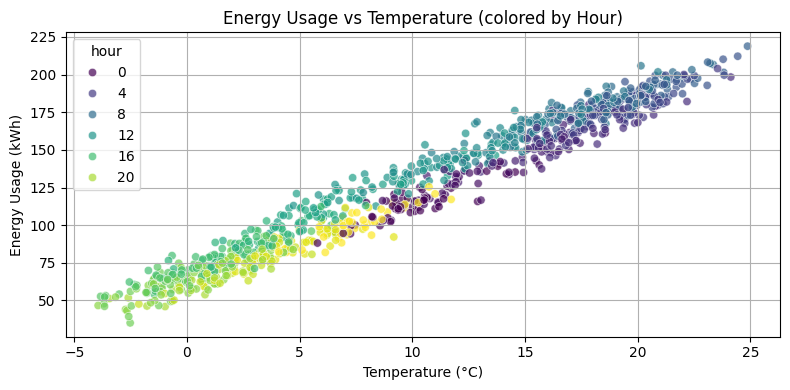

In [9]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data.sample(1000), x='temperature', y='energy_usage', hue='hour', palette='viridis', alpha=0.7)
plt.title('Energy Usage vs Temperature (colored by Hour)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Usage (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()